In [3]:
import pandas as pd
import geopandas as gpd

In [53]:
df = gpd.read_file('2018_collisions.csv')


In [54]:
#Extracting lat and long from "Location"

In [55]:
df['lat']=df['Location'].str.extract(r'\((.*),.*\)')
df['long']=df['Location'].str.extract(r'\(.*,(.*)\)')
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,geometry,lat,long
0,190815321,09/09/2019,09/09/2018,1445,08,West LA,0855,997,TRAFFIC COLLISION,3008 3025 3035 3037 3102 3401 3701 4027,...,F,W,101,STREET,WESTWOOD BL,SANTA MONICA BL,"(34.0499, -118.437)",None,34.0499,-118.437
1,180817108,10/01/2018,09/30/2018,2210,08,West LA,0855,997,TRAFFIC COLLISION,3035 3037 3101 3401 3701 3027 3003 4027,...,F,O,101,STREET,WESTWOOD,MASSACHUSETTS AV,"(34.0519, -118.4388)",None,34.0519,-118.4388
2,190814307,08/17/2018,08/17/2018,1135,08,West LA,0827,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4008,...,M,W,101,STREET,BEVERLY CT,SUNSET BL,"(34.0638, -118.4703)",None,34.0638,-118.4703
3,180821291,12/27/2018,12/27/2018,1620,08,West LA,0841,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3104 3401 3701 4008,...,M,H,101,STREET,SANTA MONICA,SALTAIR,"(34.0406, -118.4633)",None,34.0406,-118.4633
4,180821178,12/25/2018,12/25/2018,1545,08,West LA,0852,997,TRAFFIC COLLISION,3004 3025 3035 3036 3101 3401 3701 4027,...,M,H,101,STREET,SANTA MONICA BL,WESTGATE AV,"(34.0424, -118.4592)",None,34.0424,-118.4592


In [56]:
df['lat']=df['lat'].astype(float)
df['long']=df['long'].astype(float)

In [57]:
df.dtypes

DR Number                   object
Date Reported               object
Date Occurred               object
Time Occurred               object
Area ID                     object
Area Name                   object
Reporting District          object
Crime Code                  object
Crime Code Description      object
MO Codes                    object
Victim Age                  object
Victim Sex                  object
Victim Descent              object
Premise Code                object
Premise Description         object
Address                     object
Cross Street                object
Location                    object
geometry                  geometry
lat                        float64
long                       float64
dtype: object

In [58]:
df[['DR Number','Location','Date Reported','Address','Cross Street','Victim Age']]

,DR Number,Location,Date Reported,Address,Cross Street,Victim Age
0,190815321,"(34.0499, -118.437)",09/09/2019,WESTWOOD BL,SANTA MONICA BL,37
1,180817108,"(34.0519, -118.4388)",10/01/2018,WESTWOOD,MASSACHUSETTS AV,57
2,190814307,"(34.0638, -118.4703)",08/17/2018,BEVERLY CT,SUNSET BL,28
3,180821291,"(34.0406, -118.4633)",12/27/2018,SANTA MONICA,SALTAIR,27
4,180821178,"(34.0424, -118.4592)",12/25/2018,SANTA MONICA BL,WESTGATE AV,60
...,...,...,...,...,...,...
2737,190804767,"(34.0461, -118.5242)",01/19/2019,SUNSET BL,MONUMENT ST,58
2738,190805231,"(34.0467, -118.4341)",01/29/2019,LA GRANGE AV,WESTWOOD BL,
2739,190805973,"(34.0473, -118.4519)",02/15/2019,OHIO AV,PURDUE AV,27
2740,190804939,"(34.0724, -118.4674)",01/23/2019,SUNSET BL,CHURCH LN,45


In [59]:
#Cleaning Data

In [60]:
desired_columns = ['DR Number','Date Reported','Address','Cross Street','Victim Age','lat','long']

In [61]:
#Creating second data fram(trimmed)

In [62]:
df2=df[desired_columns]

In [63]:
import folium

In [64]:
latitude = df.lat.mean()
latitude

34.052312509117435

In [65]:
longitude = df.long.mean()
longitude

-118.44322151714078

In [66]:
df = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.long, df2.lat), crs="EPSG:4326")
collisions.head()

,DR Number,Date Reported,Address,Cross Street,Victim Age,lat,long,geometry
0,190815321,09/09/2019,WESTWOOD BL,SANTA MONICA BL,37,34.0499,-118.4370,POINT (-118.43700 34.04990)
1,170812037,06/26/2017,OVERLAND,SANTA MONICA FY,56,34.0319,-118.4172,POINT (-118.41720 34.03190)
2,170813547,07/28/2017,BARRINGTON AV,N MAYFIELD RD,48,34.0518,-118.4634,POINT (-118.46340 34.05180)
3,170818830,11/21/2017,WILSHIRE BL,BUNDY,47,34.0434,-118.4683,POINT (-118.46830 34.04340)
4,180817108,10/01/2018,WESTWOOD,MASSACHUSETTS AV,57,34.0519,-118.4388,POINT (-118.43880 34.05190)


In [69]:
#Gets rid of all lat and long that have been put in data.

In [67]:
df = df[(df['lat'] !=  0) & (df['long'] !=0)]
df.head()

,DR Number,Date Reported,Address,Cross Street,Victim Age,lat,long,geometry
0,190815321,09/09/2019,WESTWOOD BL,SANTA MONICA BL,37,34.0499,-118.4370,POINT (-118.43700 34.04990)
1,180817108,10/01/2018,WESTWOOD,MASSACHUSETTS AV,57,34.0519,-118.4388,POINT (-118.43880 34.05190)
2,190814307,08/17/2018,BEVERLY CT,SUNSET BL,28,34.0638,-118.4703,POINT (-118.47030 34.06380)
3,180821291,12/27/2018,SANTA MONICA,SALTAIR,27,34.0406,-118.4633,POINT (-118.46330 34.04060)
4,180821178,12/25/2018,SANTA MONICA BL,WESTGATE AV,60,34.0424,-118.4592,POINT (-118.45920 34.04240)


<Axes: >

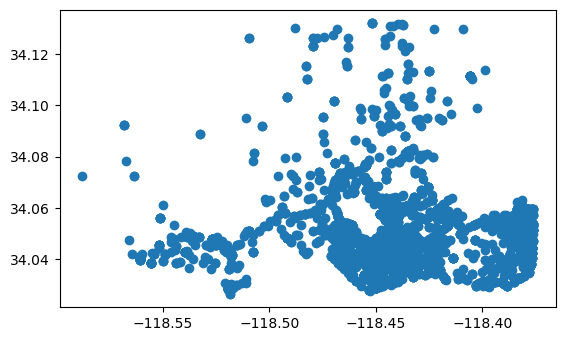

In [68]:
df.plot()